In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import matplotlib
from matplotlib.widgets import Slider
from modelfnc import model ,create_array, get_max,get_model,get_slider,update 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import style
style.use('ggplot')

#df1 = pd.read_csv("/home/joe/python/seir-model/cov2.csv")
#dates=df1.columns[4::]
#days=np.linspace(1,67,67)
#df1['Country/Region']
#casedf=df1.loc[df1['Country/Region'] == 'US']
#cases=(casedf.iloc[0,4:])/330000000*100

In [8]:
# Initial condition
N=330000000; #330 million people
e0=1/N #ercent exposed 
s0 = 1-e0;   #percent susceptible
i0=0;        #Infection Rate
r0=0;        #Rate Recovering or Dead
t = np.array(range(0,200)) #Number of Days the virus has/will spread

In [9]:
# Virus dependent constants

incubation_period=5; #Time before virus is infectious

alpha=1/incubation_period; #The inverse of the incubation period (1/t_incubation) 

contact_rate=2; #Infection producing contacts per time2.28

serial_interval=6.2;#Mean time between successive cases in serial
                    #transmission [Days]                              

time_infectous=(serial_interval-incubation_period)#Days available 
                                                #for transmission

gamma=1/time_infectous; #Inverse of the mean infection period (1/t_infectious)   

rho=1; #Level of social distancing

#tps://science.sciencemag.org/conte
#https://www.ncbi.nlm.nih.gov
#https://www.nature.com/articles/s41421-020-0148-0


init_cond=[s0,e0,i0,r0]
create_array(t)

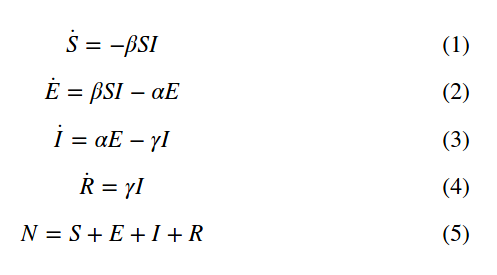


Above shows the system of differential equations I used to solve the SEIR Model where: 

S = Number of susceptible people in the population

E = Number of people exposed to the virus

I = Number of people infected ***divided by the total population***

R = Number of people removed (Recovered or Dead)

Several variables change the outcome of the solutions for the above values. These being:

- Incubation Period (Time before virus becomes infectious)
- Contact Rate  (Infection rate/time * time infected)
- Time Infectious
- Level of Social Distancing
 
 
 
 
 
WARNING... This model relies on the Incubation period being shorter than the serial interval as it assumes you cannot transmit the virus without having symptoms. However, the actual data of covid 19 show that there is a significant portion of asymptomatic transmission.

<IPython.core.display.Javascript object>


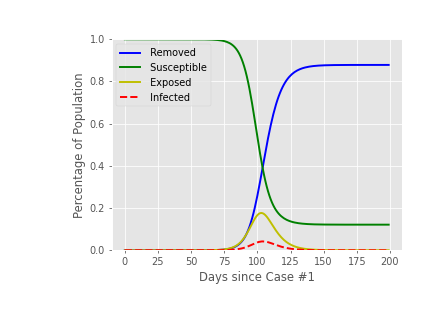

In [10]:
###### def plot_interactive(alpha,gamma,contact_rate,rho):
%matplotlib notebook

#Call odeint model 
susceptible, exposed,infected,removed=get_model(init_cond,t,gamma,alpha,rho,contact_rate)

#Plot initial static picture of SEIR model
fig=plt.figure(1)
plotting=fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
plt.plot(t,removed,'b-',linewidth=2,label=' Removed')
plt.plot(t,susceptible,'g-',linewidth=2,label=' Susceptible')
plt.plot(t,exposed,'y-',linewidth=2,label=' Exposed')
plt.plot(t,infected,'r--',linewidth=2,label=' Infected')
plt.ylabel('Percentage of Population')
plt.xlabel('Days since Case #1')
plt.ylim(0,1)
plt.legend()

#daystot=72;#Days from first infection
#plt.plot(days,cases,'r*',label='Real Data')
#plt.annotate('Current Day',(daystot,0.2) ,(daystot-80,0.2),
#             arrowprops=dict(facecolor='red',shrink=50,width=1))

<IPython.core.display.Javascript object>


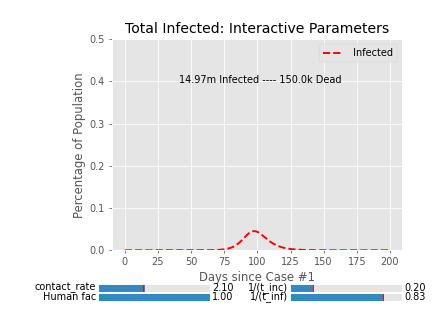

In [11]:
#plot_interactive model with changing parameters
%matplotlib notebook
fig2=plt.figure(2)
plot2=fig2.add_subplot(1,1,1)
plt.ylabel('Percentage of Population')
plt.xlabel('Days since Case #1')
fig2.subplots_adjust(left=0.25, bottom=0.25)
plt.ylim(0,.5)

plt.title('Total Infected: Interactive Parameters')
lin2,=plt.plot(t,odeint(model,init_cond,t,args=(gamma,alpha,rho,contact_rate))[:,2],
                  'r--',linewidth=2,label=' Infected')
plt.legend()

cont_slider,rho_slider,alpha_slider,gamma_slider=get_slider(init_cond,t,gamma,alpha,rho,contact_rate)
Q=get_max(odeint(model,init_cond,t,args=(gamma,alpha,
                                          rho,contact_rate)))
ann=[plt.annotate(Q[2],xy=(t[Q[1][1]][0], Q[0]), xytext=(t[Q[1][1]][0]+30, Q[0]),)]

def update(a):
    ann[0].remove()
    Q=get_max(odeint(model,init_cond,t,args=(gamma_slider.val,alpha_slider.val,rho_slider.val,cont_slider.val))[:,2])

    ann[0]=plot2.annotate(Q[2],xy=(t[Q[1][1]][0], Q[0]), xytext=(.40, .75), xycoords='figure fraction')
    lin2.set_ydata(odeint(model,init_cond,t,args=(gamma_slider.val,alpha_slider.val,rho_slider.val,
                                                  cont_slider.val))[:,2])
    fig2.canvas.draw_idle()   

cont_slider.on_changed(update)
alpha_slider.on_changed(update)
rho_slider.on_changed(update)
gamma_slider.on_changed(update)
plt.show()